# Your name: Justin Shadbehr
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [2]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Data File Reading Section
## Write code to read in data from external sources here

In [3]:
#read datasets
data = pd.read_csv('data.csv', encoding = "ISO-8859-1")

C:\Users\Acesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [5]:
# Your code for this section here ...
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [6]:
data.shape

(435742, 13)

In [7]:
data.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [8]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [10]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [11]:
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [12]:
# Cleaning up the data

#dropping columns that aren't required

data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis = 1, inplace=True)

# dropping rows where no date is available

data = data.dropna(subset=['date'])

In [13]:
# displaying final columns (data.columns)

data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

In [14]:
data.head(20)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [15]:
# ... Your code here

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [16]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [17]:
# ... Your code here
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['year'] = data['date'].dt.year

In [18]:
data.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [19]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here

COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[COLS] = imputer.fit_transform(data[COLS])


In [20]:
data.info

<bound method DataFrame.info of                  state   location   type   so2   no2        rspm        spm  \
0       Andhra Pradesh  Hyderabad    RRO   4.8  17.4  108.833091  220.78348   
1       Andhra Pradesh  Hyderabad      I   3.1   7.0  108.833091  220.78348   
2       Andhra Pradesh  Hyderabad    RRO   6.2  28.5  108.833091  220.78348   
3       Andhra Pradesh  Hyderabad    RRO   6.3  14.7  108.833091  220.78348   
4       Andhra Pradesh  Hyderabad      I   4.7   7.5  108.833091  220.78348   
...                ...        ...    ...   ...   ...         ...        ...   
435734     West Bengal   ULUBERIA  RIRUO  20.0  44.0  148.000000  220.78348   
435735     West Bengal   ULUBERIA  RIRUO  17.0  44.0  131.000000  220.78348   
435736     West Bengal   ULUBERIA  RIRUO  18.0  45.0  140.000000  220.78348   
435737     West Bengal   ULUBERIA  RIRUO  22.0  50.0  143.000000  220.78348   
435738     West Bengal   ULUBERIA  RIRUO  20.0  46.0  171.000000  220.78348   

            pm2_5  

In [21]:
print(data.isnull().sum())

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64


In [22]:
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,108.833091,220.78348,40.791467,1990-03-01,1990
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,108.833091,220.78348,40.791467,1990-04-01,1990
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,108.833091,220.78348,40.791467,1990-04-01,1990
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,108.833091,220.78348,40.791467,1990-04-01,1990
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,108.833091,220.78348,40.791467,1990-05-01,1990


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [48]:
# ... Your code here

so2 = data.groupby(['state']).so2.median()
so2 = pd.DataFrame(so2)
so2 = so2.sort_values(by = 'so2', ascending = True)
so2

,so2
state,
Nagaland,2.000000
Mizoram,2.000000
Meghalaya,2.000000
Arunachal Pradesh,2.500000
Himachal Pradesh,3.000000
Kerala,4.200000
Telangana,5.000000
Odisha,5.000000
Jammu & Kashmir,5.000000


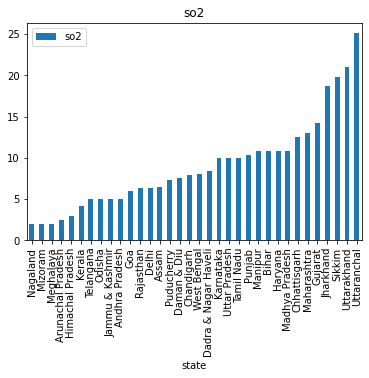

In [24]:
so2.plot.bar(rot=90, title = 'so2');

### no2 status

In [41]:
# ... Your code here
no2 = data.groupby(['state']).no2.median()
no2 = pd.DataFrame(no2)
no2 = no2.sort_values(by = 'no2', ascending = True)
no2

,no2
state,
Arunachal Pradesh,5.000000
Mizoram,5.000000
Nagaland,7.000000
Meghalaya,10.000000
Goa,11.600000
Puducherry,13.000000
Jammu & Kashmir,13.000000
Himachal Pradesh,13.900000
Kerala,14.000000


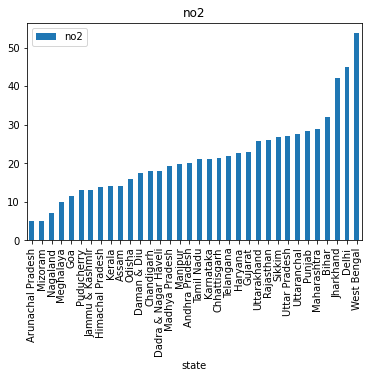

In [26]:
no2.plot.bar(rot=90, title = 'no2');

### rspm status

In [42]:
# ... Your code here
rspm = data.groupby(['state']).rspm.median()
rspm = pd.DataFrame(rspm)
rspm = rspm.sort_values(by = 'rspm', ascending = True)
rspm

,rspm
state,
Sikkim,32.000000
Mizoram,40.000000
Puducherry,46.000000
Kerala,49.000000
Goa,56.000000
Meghalaya,57.000000
Tamil Nadu,59.000000
Manipur,61.000000
Karnataka,63.000000


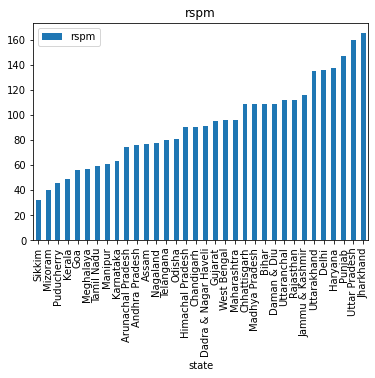

In [28]:
rspm.plot.bar(rot=90, title = 'rspm');

### spm status

In [43]:
# ... Your code here
spm = data.groupby(['state']).spm.median()
spm = pd.DataFrame(spm)
spm = spm.sort_values(by = 'spm', ascending = True)
spm

,spm
state,
Sikkim,75.00000
Manipur,120.50000
Puducherry,191.00000
Goa,199.00000
Daman & Diu,200.50000
Andhra Pradesh,220.78348
Meghalaya,220.78348
Mizoram,220.78348
Nagaland,220.78348


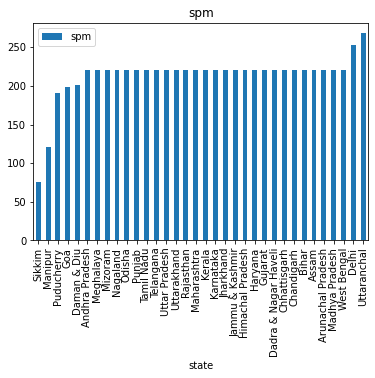

In [30]:
spm.plot.bar(rot=90, title = 'spm');

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [31]:
# ... Your code here
yearly_trends = data[data.state == 'Andhra Pradesh']
yearly_trends = data.groupby('year', as_index = False)['so2','no2', 'rspm', 'spm'].mean()

<ipython-input-31-7648bb26123d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_trends = data.groupby('year', as_index = False)['so2','no2', 'rspm', 'spm'].mean()


In [32]:
yearly_trends.head(5)

,year,so2,no2,rspm,spm
0,1987,18.897791,29.491230,108.833091,278.401290
1,1988,20.094001,29.760829,108.833091,247.353570
2,1989,18.315661,29.133042,108.833091,237.620273
3,1990,17.467824,25.716276,108.833091,242.305362
4,1991,17.175638,25.979131,108.833091,241.396689


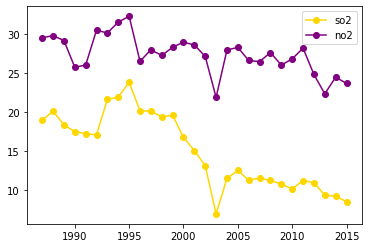

In [37]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here

so2 = plt.plot(yearly_trends.year, yearly_trends.so2, color = 'gold', marker = 'o')
no2 = plt.plot(yearly_trends.year, yearly_trends.no2, color = 'purple', marker = 'o')
plt.legend((['so2','no2']))
plt.show()

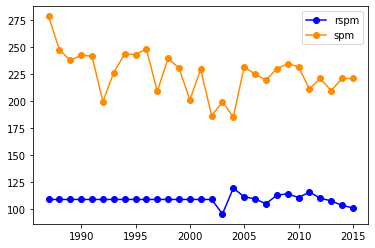

In [35]:
plt.plot(yearly_trends.year, yearly_trends.rspm, color = 'blue', marker = 'o')
plt.plot(yearly_trends.year, yearly_trends.spm, color = 'darkorange', marker = 'o')
plt.legend((['rspm','spm']))
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....

Yes, the mean value of spm has been climbing since 2005 into 2015 which should be looked into. No2 and So2 both seem to be mirroing each other over the average course of time. Rspm is trending downwards close to the lowest levels in over 20 years. 


